# Exploratory Data Analysis on Spotify Top 50 Global songs 

Objective: To Analyse the range of attributes that makes a song popular among the listeners

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_json('spotifyTop50.json')

In [45]:
df.head()

,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,200040,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4,0.334
1,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.24700,0.746,181733,0.690,0.000000,11,0.1010,-7.956,1,0.1640,89.977,4,0.497
2,Roses - Imanbek Remix,24Yi9hE78yPEbZ4kxyoXAI,0.01670,0.770,176840,0.724,0.010700,8,0.3530,-5.484,1,0.0495,121.975,4,0.898
3,Toosie Slide,466cKvZn1j45IpxDdYZqdA,0.28900,0.830,247059,0.490,0.000003,1,0.1130,-8.820,0,0.2090,81.604,4,0.845
4,death bed (coffee for your head) (feat. beabad...,7eJMfftS33KTjuF7lTsMCx,0.73100,0.726,173333,0.431,0.000000,8,0.6960,-8.765,0,0.1350,144.026,4,0.348


In [46]:
print(df.shape)
print(df.columns)

(50, 15)
Index(['track_name', 'track_id', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


# Univariate Analysis

Since the time_signature of every song is same so we will not consider that feature.

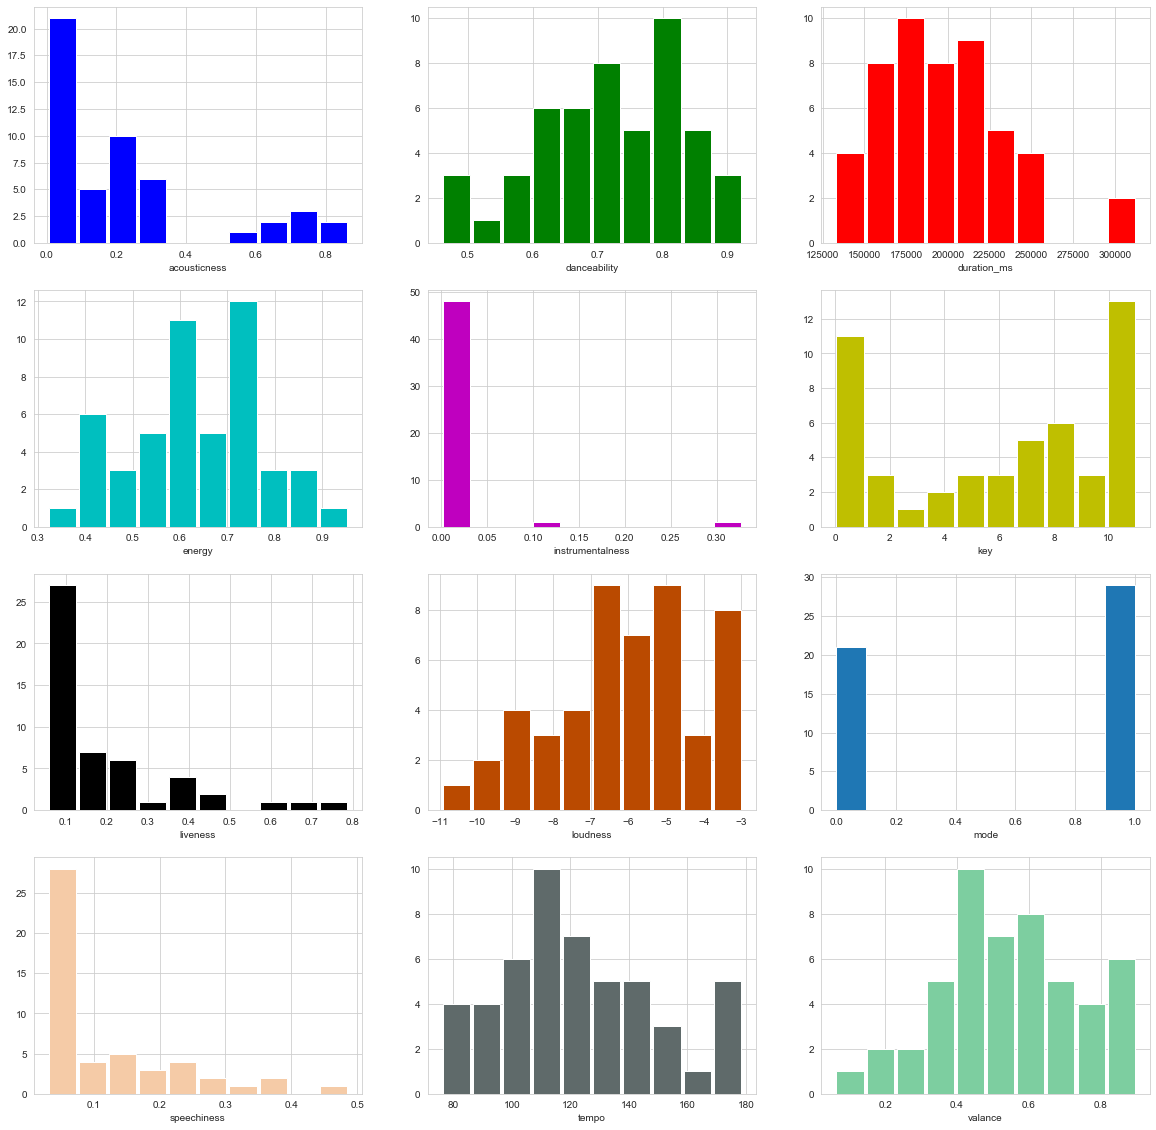

In [47]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4,3,1)
plt.hist(df['acousticness'], rwidth=.9, color='b')
plt.xlabel('acousticness')

plt.subplot(4,3,2)
plt.hist(df['danceability'], rwidth=.9, color='g')
plt.xlabel('danceability')

plt.subplot(4,3,3)
plt.hist(df['duration_ms'], rwidth=.9, color='r')
plt.xlabel('duration_ms')

plt.subplot(4,3,4)
plt.hist(df['energy'], rwidth=.9, color='c')
plt.xlabel('energy')

plt.subplot(4,3,5)
plt.hist(df['instrumentalness'], rwidth=.9, color='m')
plt.xlabel('instrumentalness')

plt.subplot(4,3,6)
plt.hist(df['key'], rwidth=.9, color='y')
plt.xlabel('key')

plt.subplot(4,3,7)
plt.hist(df['liveness'], rwidth=.9, color='k')
plt.xlabel('liveness')

plt.subplot(4,3,8)
plt.hist(df['loudness'], rwidth=.9, color='#BA4A00')
plt.xlabel('loudness')

plt.subplot(4,3,9)
plt.hist(df['mode'])
plt.xlabel('mode')

plt.subplot(4,3,10)
plt.hist(df['speechiness'], rwidth=.9, color='#F5CBA7')
plt.xlabel('speechiness')

plt.subplot(4,3,11)
plt.hist(df['tempo'], rwidth=.9, color='#5F6A6A')
plt.xlabel('tempo')

plt.subplot(4,3,12)
plt.hist(df['valence'], rwidth=.9, color='#7DCEA0')
plt.xlabel('valance')

plt.show()

Observation:
    * Majority Songs have acousticness less than 0.4
    * Majority Songs have danceabilty greater than 0.6
    * Majority Songs have duration_ms between 150000 ms to 325000 ms
      (greater than 2 min 30 sec and less than 3 min 45 sec)
    * Majority Songs have energy between 0.58-0.63 and 0.70-0.77
    * Majority Songs have instrumentalness less than 0.005
    * Majority Songs have key value 0 (C) or 11 (B)
    * Majority Songs have liveness less than 0.12
    * Majority Songs have loudness greater than value -7
    * The Modality of the song is distributed almost equaly 
      (29 songs have mode value 1(major) while 21 have mode value 0(minor))
    * Majority Songs have speechiness less than 0.1
    * Majority Songs have tempo betweeen 100 to 150
    * Majority Songs have valance greater than 0.4

In [48]:
pf = df.copy()

In [49]:
del pf['track_id']
del pf['time_signature']
del pf['mode']
del pf['key']
del pf['loudness']
del pf['duration_ms']
del pf['acousticness']
del pf['instrumentalness']

In [50]:
print(pf.columns)

Index(['track_name', 'danceability', 'energy', 'liveness', 'speechiness',
       'tempo', 'valence'],
      dtype='object')


# Bivariate Analysis

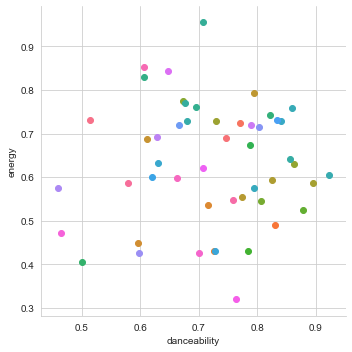

In [51]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'track_name', height = 5) \
   .map(plt.scatter, 'danceability', 'energy')
plt.show()

Observation:
    * No Popular Track has energy above 0.8 when danceability is less than 0.6 and greater than 0.8  
    * No Popular Track has energy below 0.8 when danceability is less than 0.75 and greater than 0.79
    * Majority Track has energy between 0.5 and 0.8 when danceability is between 0.6 and 0.9

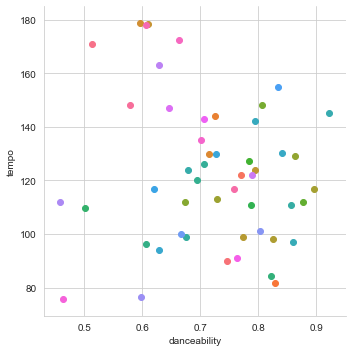

In [52]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'track_name', height = 5) \
   .map(plt.scatter, 'danceability', 'tempo')
plt.show()

Observations:
    * No Popular track has tempo above 160 when danceability is above 0.7
    * Most Popular songs have tempo between 85 to 150 when danceability is between 0.6 to 0.9

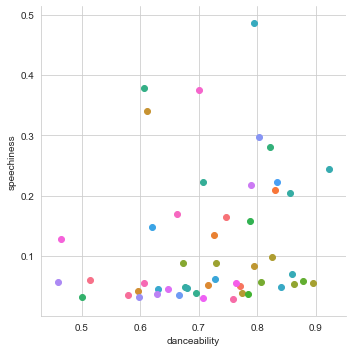

In [53]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'track_name', height = 5) \
   .map(plt.scatter, 'danceability', 'speechiness')
plt.show()

Observations:
    
    *No Popular track have danceability value less than 0.6 when speechiness value is greater than 0.15
    *Majority of tracks have danceability between 0.6 and 0.9 while speechiness is less than 0.2

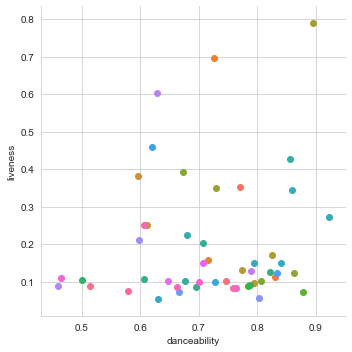

In [54]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'track_name', height = 5) \
   .map(plt.scatter, 'danceability', 'liveness')
plt.show()

Observations:

    *Majority of tracks have danceability between 0.6 and 0.9 while liveness is less than 0.3
    *No popular track whose liveness value is greater than 0.4 is danceable

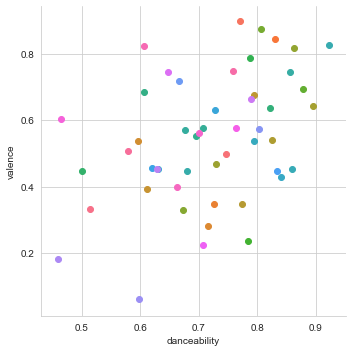

In [55]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'track_name', height = 5) \
   .map(plt.scatter, 'danceability', 'valence')
plt.show()

Observations:
    
    *Most of the popular tracks have valence between 0.2 and 0.9 and danceability between 0.6 and 0.9

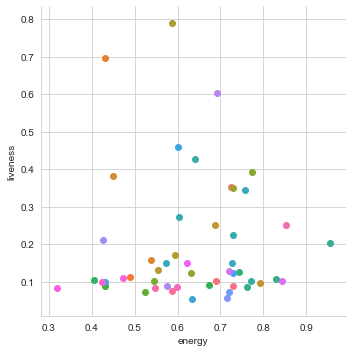

In [56]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'track_name', height = 5) \
   .map(plt.scatter, 'energy', 'liveness')
plt.show()

Observations:
    
    *Majority of popular tracks have liveness value between 0 and 0.3 while energy between 0.4 and 0.8

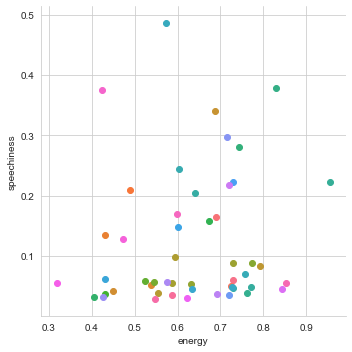

In [57]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'track_name', height = 5) \
   .map(plt.scatter, 'energy', 'speechiness')
plt.show()

Observations:
    
    *Majority songs have speechiness value less than 0.2 with energy varying from 0.4 to 0.85

# Conclusion

Finally after analysis various components of a track I came up with the conclusion that in order to make a track
popular there is a common range for the attributes of a track which makes it likeable and popular.
During this EDA I found that a track should have:

    -less acousticness between 0 to 0.25
    -high danceability between 0.6 to 0.9
    -duration of around 1.5 to 2.5 minutes
    -preferable energy value between 0.4 to 0.8
    -negligeble instrumentalness
    -low liveness value between 0 to 0.2
    -very low speechiness value between 0 to 0.1
    -valence ranging between 0.3 to 0.7
    
The attributes like mode, key, loudness and duration does not contribute to that extent.